## Time Series Analysis & Weather Predictor

* 12th August 2022
* Task:Get the data from www.ecad.eu and do future prediction


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')


## Load data

In [2]:
df=pd.read_csv('TG_STAID002759.txt', sep=",", header=14,names=["SOUID","DATE", "TG", "Q_TG"], parse_dates=True)
df.head(3)

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0


## Data Exploration & Cleaning

In [3]:
temp=df['TG']

In [4]:
s=df['DATE']

da=[]
for i in s:
    i=str(i)
    w=i[:4]+"-" + i[4:6]+"-"+i[6:]
    #print(w)
    da.append(w)
    

In [5]:
temp=df['TG']

Temp=[]
for i in temp:
    t=i/10
    Temp.append(t)


In [6]:
df2=pd.DataFrame(data={'date':da})
df3=pd.DataFrame(data={'TG_New':Temp})

In [7]:
df = pd.concat([df, df2,df3], axis=1, join='inner')
df.head(4)

,SOUID,DATE,TG,Q_TG,date,TG_New
0,127488,18760101,22,0,1876-01-01,2.2
1,127488,18760102,25,0,1876-01-02,2.5
2,127488,18760103,3,0,1876-01-03,0.3
3,127488,18760104,-58,0,1876-01-04,-5.8


In [8]:
def Data_Datetime_Trans(DataName):
    df['datetime'] = pd.to_datetime(df['date'])
    import datetime
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month_name()
    df['day'] = df['datetime'].dt.day
    df['month_No'] = df['datetime'].dt.month
    df.set_index(df['datetime'], inplace=True)
    return DataName

In [9]:
Data_Datetime_Trans(df).head(3)

,SOUID,DATE,TG,Q_TG,date,TG_New,datetime,year,month,day,month_No
datetime,,,,,,,,,,,
1876-01-01,127488,18760101,22,0,1876-01-01,2.2,1876-01-01,1876,January,1,1
1876-01-02,127488,18760102,25,0,1876-01-02,2.5,1876-01-02,1876,January,2,1
1876-01-03,127488,18760103,3,0,1876-01-03,0.3,1876-01-03,1876,January,3,1


In [10]:
dff= df.drop(columns=['SOUID','DATE','TG','Q_TG','date','datetime','month','day','month_No'])

In [11]:
dff.head(4)

,TG_New,year
datetime,,
1876-01-01,2.2,1876
1876-01-02,2.5,1876
1876-01-03,0.3,1876
1876-01-04,-5.8,1876


In [12]:
# engineer timestep variable for future convenience

dff['timestep'] = list(range(dff.shape[0]))
dff.head()

,TG_New,year,timestep
datetime,,,
1876-01-01,2.2,1876,0
1876-01-02,2.5,1876,1
1876-01-03,0.3,1876,2
1876-01-04,-5.8,1876,3
1876-01-05,-9.8,1876,4


In [13]:
# Create the seasonal 
seasonal_dummies = pd.get_dummies(dff.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(dff.index)

dff = dff.join(seasonal_dummies)
dff.head()

,TG_New,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,,,
1876-01-01,2.2,1876,0,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.5,1876,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0.3,1876,2,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,1876,3,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,1876,4,0,0,0,0,0,0,0,0,0,0,0


## Plot the Temperature time series

In [14]:
dff = dff.loc[(dff['year'] > 1945) & (df['year'] < 2023)]  # 

Text(0.5, 1.0, '76 years temperature time series during 1946 - 2022 ')

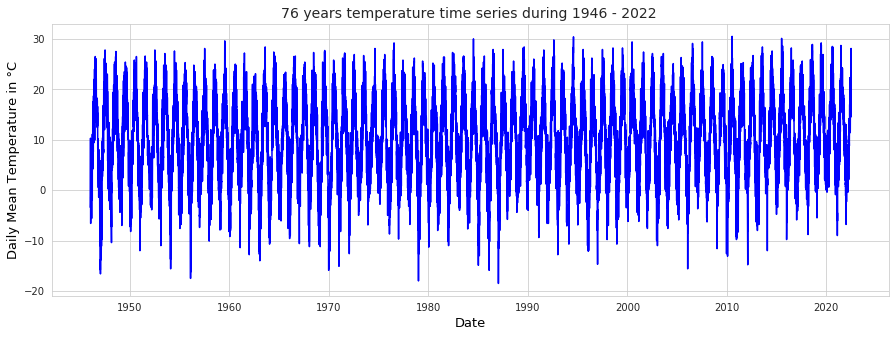

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(dff['TG_New'],color='blue')
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Daily Mean Temperature in °C',fontsize=13,color='k')
plt.title('76 years temperature time series during 1946 - 2022 ', fontsize=14)


## Train-Test-Split the temperature data

In [16]:
df_train = dff.loc[(dff['year'] > 1945) & (dff['year'] < 2022)]  # 

df_test = dff.loc[(dff['year'] >= 2021) & (dff['year'] < 2023)]  # 15

## Model the trend

In [17]:
# Create a timestep variable
df_train=df_train.drop(columns=['year'])
df_train['timestep'] = list(range(df_train.shape[0]))
df_train.head()


,TG_New,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,,
1946-01-01,-3.4,0,0,0,0,0,0,0,0,0,0,0,0
1946-01-02,-3.0,1,0,0,0,0,0,0,0,0,0,0,0
1946-01-03,-2.8,2,0,0,0,0,0,0,0,0,0,0,0
1946-01-04,-2.7,3,0,0,0,0,0,0,0,0,0,0,0
1946-01-05,1.4,4,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Feature and target for trend model

Temp=df_train

X_trend = Temp.drop(columns=['TG_New'])
y_trend=Temp['TG_New']

In [19]:
# Fit a linear function of the timestep to data

from sklearn.linear_model import LinearRegression

trend_model=LinearRegression()
trend_model.fit(X_trend,y_trend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict from the fitted model

In [20]:
Temp['trend_seasonal']=trend_model.predict(X_trend)
Temp.head(4)

,TG_New,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
datetime,,,,,,,,,,,,,,
1946-01-01,-3.4,0,0,0,0,0,0,0,0,0,0,0,0,-0.475454
1946-01-02,-3.0,1,0,0,0,0,0,0,0,0,0,0,0,-0.475392
1946-01-03,-2.8,2,0,0,0,0,0,0,0,0,0,0,0,-0.475330
1946-01-04,-2.7,3,0,0,0,0,0,0,0,0,0,0,0,-0.475268


#### Plot trend and original temperature data

Text(0.5, 1.0, '75 years temperature time series during 1946 - 2021 ')

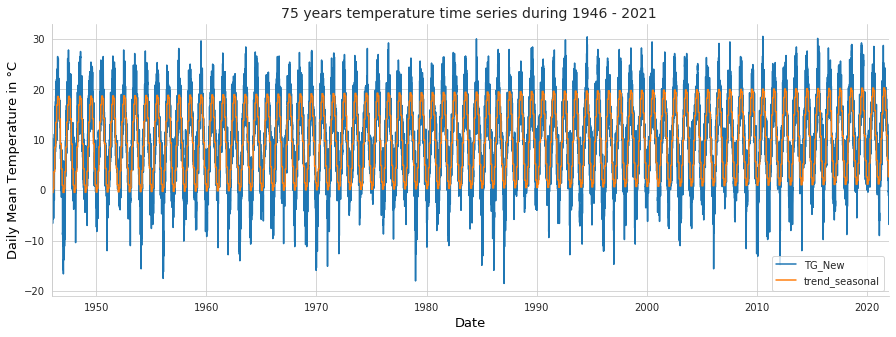

In [108]:
import matplotlib.pyplot as plt

Temp[['TG_New','trend_seasonal']].plot(figsize=(15,5),legend=True)
sns.despine()
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Daily Mean Temperature in °C',fontsize=13,color='k')
plt.title('75 years temperature time series during 1946 - 2021 ', fontsize=14)

Text(0.5, 1.0, '3 years temperature time series during 1946 - 1948 ')

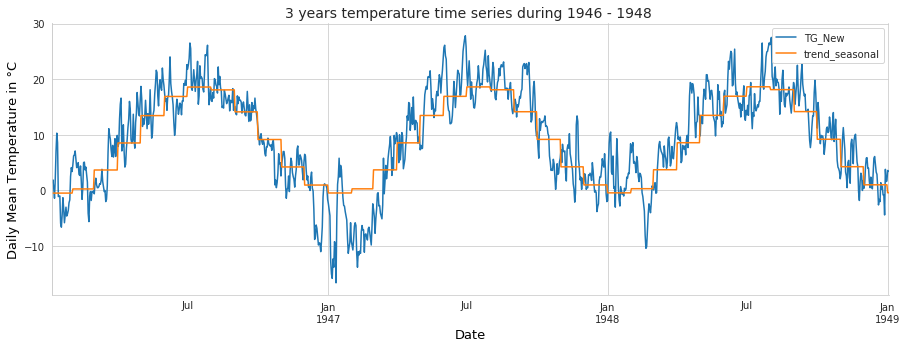

In [109]:
Temp[['TG_New','trend_seasonal']][:365*3].plot(figsize=(15,5))
sns.despine()
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Daily Mean Temperature in °C',fontsize=13,color='k')
plt.title('3 years temperature time series during 1946 - 1948 ', fontsize=14)


## Model seasonality

##### First, we extract the remainder 

In [23]:
# Subtract trend from Temperature data

Temp['remainder']=Temp['TG_New']- Temp['trend_seasonal']

Text(0, 0.5, 'Temperature remainders [°C]')

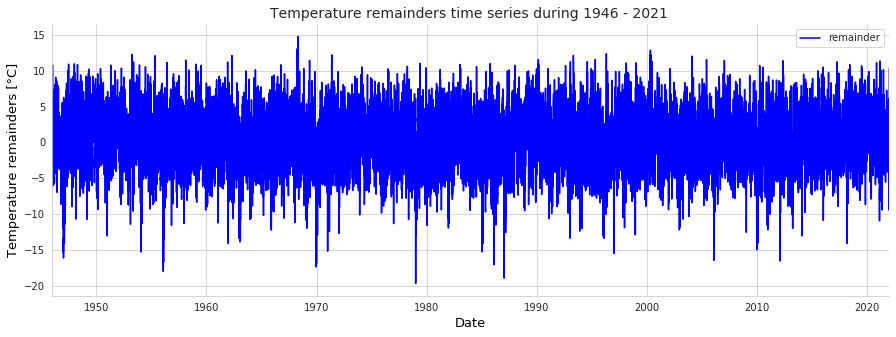

In [113]:
# plot the remainder
Temp[['remainder']].plot(figsize=(15,5),color='b')

ax=sns.despine()
plt.title('Temperature remainders time series during 1946 - 2021 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature remainders [°C]',fontsize=13,color='k')


Text(0, 0.5, 'Temperature remainders [°C]')

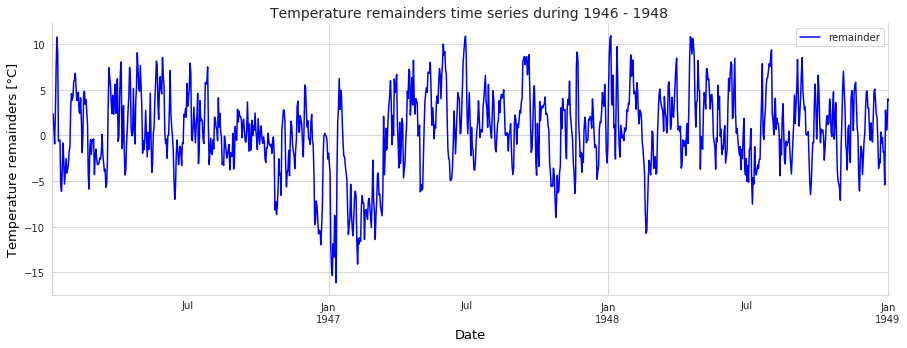

In [114]:
# plot the remainder
Temp[['remainder']][:365*3].plot(figsize=(15,5),color='b')

ax=sns.despine()
plt.title('Temperature remainders time series during 1946 - 1948 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature remainders [°C]',fontsize=13,color='k')

In [26]:
Temp.head()

,TG_New,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder
datetime,,,,,,,,,,,,,,,
1946-01-01,-3.4,0,0,0,0,0,0,0,0,0,0,0,0,-0.475454,-2.924546
1946-01-02,-3.0,1,0,0,0,0,0,0,0,0,0,0,0,-0.475392,-2.524608
1946-01-03,-2.8,2,0,0,0,0,0,0,0,0,0,0,0,-0.475330,-2.324670
1946-01-04,-2.7,3,0,0,0,0,0,0,0,0,0,0,0,-0.475268,-2.224732
1946-01-05,1.4,4,0,0,0,0,0,0,0,0,0,0,0,-0.475206,1.875206


In [27]:
#flights["remainder"].std(), flights["passengers"].std()
Temp["remainder"].mean(), Temp["remainder"].std(), Temp["remainder"].std()

(-3.0027655294505332e-15, 3.9458633754760832, 3.9458633754760832)

### Cheching the remainder to determine the number of lags to use 

     ** We decide how many lags to include
     ** A lag is an interval of time between two related observations

/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Figure(432x288)


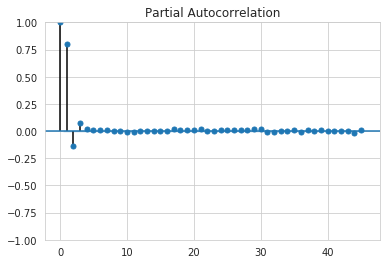

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print(plot_pacf(Temp['remainder']))

In [29]:
from statsmodels.tsa.ar_model import ar_select_order

selected_order = ar_select_order(Temp['remainder'], maxlag=12)
selected_order.ar_lags

/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4]

In [30]:
Temp['lag1'] = Temp['remainder'].shift(1)
Temp['lag2'] = Temp['remainder'].shift(2)
Temp['lag3'] = Temp['remainder'].shift(3)
Temp['lag4'] = Temp['remainder'].shift(4)
Temp.dropna(inplace=True)
Temp.head()

,TG_New,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,,,,
1946-01-05,1.4,4,0,0,0,0,0,0,0,0,0,0,0,-0.475206,1.875206,-2.224732,-2.324670,-2.524608,-2.924546
1946-01-06,1.9,5,0,0,0,0,0,0,0,0,0,0,0,-0.475145,2.375145,1.875206,-2.224732,-2.324670,-2.524608
1946-01-07,0.4,6,0,0,0,0,0,0,0,0,0,0,0,-0.475083,0.875083,2.375145,1.875206,-2.224732,-2.324670
1946-01-08,-1.4,7,0,0,0,0,0,0,0,0,0,0,0,-0.475021,-0.924979,0.875083,2.375145,1.875206,-2.224732
1946-01-09,2.0,8,0,0,0,0,0,0,0,0,0,0,0,-0.474959,2.474959,-0.924979,0.875083,2.375145,1.875206


## Run the full model

In [31]:
# Assign X
X_full = Temp.drop(columns=['TG_New','trend_seasonal', 'remainder'])
y_full = Temp['TG_New']

In [32]:
X_full.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
1946-01-05,4,0,0,0,0,0,0,0,0,0,0,0,-2.224732,-2.324670,-2.524608,-2.924546
1946-01-06,5,0,0,0,0,0,0,0,0,0,0,0,1.875206,-2.224732,-2.324670,-2.524608
1946-01-07,6,0,0,0,0,0,0,0,0,0,0,0,2.375145,1.875206,-2.224732,-2.324670
1946-01-08,7,0,0,0,0,0,0,0,0,0,0,0,0.875083,2.375145,1.875206,-2.224732
1946-01-09,8,0,0,0,0,0,0,0,0,0,0,0,-0.924979,0.875083,2.375145,1.875206


In [33]:
m_full = LinearRegression()
m_full.fit(X_full, y_full)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Create a new predictions column

Temp['predictions_full_model'] = m_full.predict(X_full)
Temp.tail()

,TG_New,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
datetime,,,,,,,,,,,,,,,,,,,,
2021-12-27,-3.9,27754,0,0,0,0,0,0,0,0,0,0,1,2.669747,-6.569747,-9.469685,-8.169623,-0.669561,-3.769499,-4.527357
2021-12-28,-0.5,27755,0,0,0,0,0,0,0,0,0,0,1,2.669809,-3.169809,-6.569747,-9.469685,-8.169623,-0.669561,-1.933276
2021-12-29,4.5,27756,0,0,0,0,0,0,0,0,0,0,1,2.669870,1.830130,-3.169809,-6.569747,-9.469685,-8.169623,0.406951
2021-12-30,9.3,27757,0,0,0,0,0,0,0,0,0,0,1,2.669932,6.630068,1.830130,-3.169809,-6.569747,-9.469685,4.482372
2021-12-31,13.0,27758,0,0,0,0,0,0,0,0,0,0,1,2.669994,10.330006,6.630068,1.830130,-3.169809,-6.569747,8.159149


### Now we plot the actual Temp. data, the Temp_trend_seasonal and the Temp prediction_full_model

Text(0, 0.5, 'Temperature remainders [°C]')

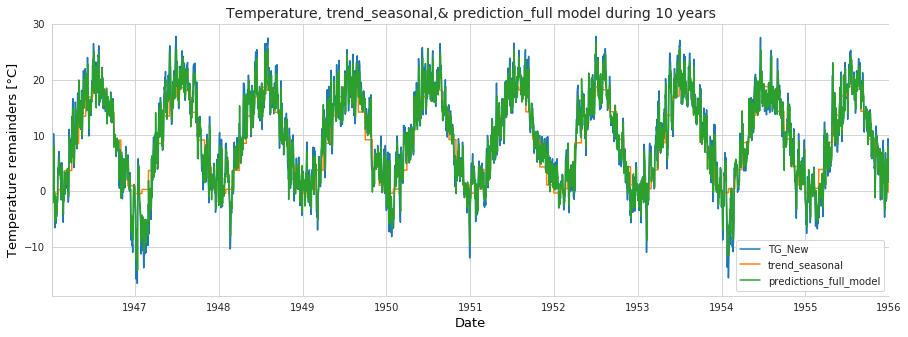

In [116]:
Temp[['TG_New', 'trend_seasonal', 'predictions_full_model']][:365*10].plot(figsize=(15,5))
ax=sns.despine()

plt.title('Temperature, trend_seasonal,& prediction_full model during 10 years', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature remainders [°C]',fontsize=13,color='k')


Text(0, 0.5, 'Temperature [°C]')

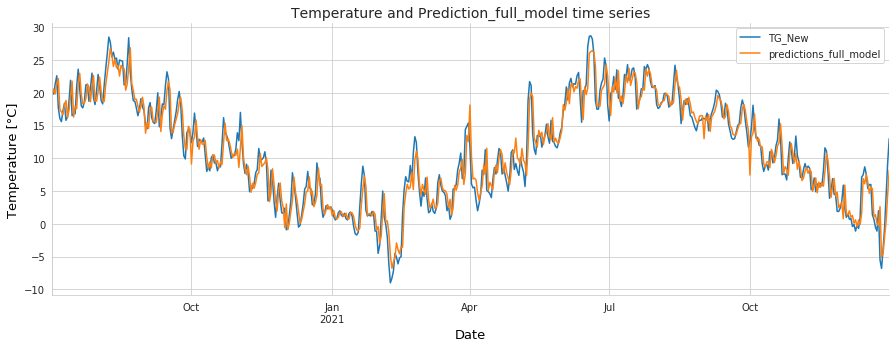

In [117]:
Temp[['TG_New', 'predictions_full_model']][-548:].plot(figsize=(15,5))
ax=sns.despine()

plt.title('Temperature and Prediction_full_model time series', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')


### *Coefficients of the AR equation's terms are:

In [37]:
pd.DataFrame(m_full.coef_.reshape(1,16), columns=X_full.columns)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
0,0.000062,0.756274,4.162332,8.973082,13.863426,17.298915,19.022342,18.443644,14.536814,9.573908,4.66422,1.423044,0.925845,-0.202584,0.055397,0.019753


### Now we evaluate how good our model is by doing using a cross-validation method

Cross-validation so far:

    Dividing training data into subsets (folds)
    in each iteration singled out one fold as validation set
    trained on the remaining training data and evaluated the fit on the validation set.

Cross-validation for time series:

    Dividing training data into subsets (folds)
    in the first iteration, use the first fold to evaluate the second fold
    in the second iteration, use the first and thesecond fold to evaluate the third fold

In [38]:
X_full.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
1946-01-05,4,0,0,0,0,0,0,0,0,0,0,0,-2.224732,-2.324670,-2.524608,-2.924546
1946-01-06,5,0,0,0,0,0,0,0,0,0,0,0,1.875206,-2.224732,-2.324670,-2.524608
1946-01-07,6,0,0,0,0,0,0,0,0,0,0,0,2.375145,1.875206,-2.224732,-2.324670
1946-01-08,7,0,0,0,0,0,0,0,0,0,0,0,0.875083,2.375145,1.875206,-2.224732
1946-01-09,8,0,0,0,0,0,0,0,0,0,0,0,-0.924979,0.875083,2.375145,1.875206


In [39]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=5)

In [40]:
# Split the training data into folds
for i, (train_index, validation_index) in enumerate(ts_split.split(X_full, y_full)):
    print(f"""The training data for the {i+1}th iteration are the observations steps 
    {train_index}""")
    print(f"""The validation data for the {i+1}th iteration are the observations steps
    {validation_index}""")
    print('\n')
    

The training data for the 1th iteration are the observations steps 
    [   0    1    2 ... 4627 4628 4629]
The validation data for the 1th iteration are the observations steps
    [4630 4631 4632 ... 9252 9253 9254]


The training data for the 2th iteration are the observations steps 
    [   0    1    2 ... 9252 9253 9254]
The validation data for the 2th iteration are the observations steps
    [ 9255  9256  9257 ... 13877 13878 13879]


The training data for the 3th iteration are the observations steps 
    [    0     1     2 ... 13877 13878 13879]
The validation data for the 3th iteration are the observations steps
    [13880 13881 13882 ... 18502 18503 18504]


The training data for the 4th iteration are the observations steps 
    [    0     1     2 ... 18502 18503 18504]
The validation data for the 4th iteration are the observations steps
    [18505 18506 18507 ... 23127 23128 23129]


The training data for the 5th iteration are the observations steps 
    [    0     1     2 ...

In [41]:
# Create the time series split
time_series_split = ts_split.split(X_full, y_full) 

In [42]:
# Do the cross validation: For the 'test scores' in the training data.
result = cross_val_score(estimator=m_full, 
                         X=X_full, y=y_full,
                         cv=time_series_split)
result

array([0.9140825 , 0.90957077, 0.90612612, 0.91755082, 0.92010401])

In [43]:
#cross_val_score?

In [44]:
result.mean()

0.913486845570791

_____________________________________________

### Now we test our model

* We are using our test data in this session.

In [45]:
Temp_test = df_test
Temp_test.head(3)

,TG_New,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,,,
2021-01-01,2.1,2021,52961,0,0,0,0,0,0,0,0,0,0,0
2021-01-02,1.1,2021,52962,0,0,0,0,0,0,0,0,0,0,0
2021-01-03,0.6,2021,52963,0,0,0,0,0,0,0,0,0,0,0


#### We re-run the procedure as we did for train data for the trend-seasonal model test:
     * We state the timestep using the last timestep of the training data.

In [46]:
# Get last timestep of the training data
last_train_timestep = Temp['timestep'][-1]


# Develope/create a timestep for the test data
Temp_test['timestep'] = list(range(last_train_timestep + 1, 
                            last_train_timestep + len(Temp_test) + 1))
Temp_test.head()

/home/seun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,TG_New,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,,,
2021-01-01,2.1,2021,27759,0,0,0,0,0,0,0,0,0,0,0
2021-01-02,1.1,2021,27760,0,0,0,0,0,0,0,0,0,0,0
2021-01-03,0.6,2021,27761,0,0,0,0,0,0,0,0,0,0,0
2021-01-04,0.8,2021,27762,0,0,0,0,0,0,0,0,0,0,0
2021-01-05,1.7,2021,27763,0,0,0,0,0,0,0,0,0,0,0


In [47]:
Temp_test.columns

Index(['TG_New', 'year', 'timestep', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [48]:
X_test = Temp_test.drop(columns=['TG_New','year'])
X_test.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
datetime,,,,,,,,,,,,
2021-01-01,27759,0,0,0,0,0,0,0,0,0,0,0
2021-01-02,27760,0,0,0,0,0,0,0,0,0,0,0
2021-01-03,27761,0,0,0,0,0,0,0,0,0,0,0
2021-01-04,27762,0,0,0,0,0,0,0,0,0,0,0
2021-01-05,27763,0,0,0,0,0,0,0,0,0,0,0


### Predict trend and seasonality for the test using 'train_model' (trend_seasonal model for the training).

In [49]:
Temp_test['trend_seasonal'] = trend_model.predict(X_test)
Temp_test.head(3)

/home/seun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TG_New,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
datetime,,,,,,,,,,,,,,,
2021-01-01,2.1,2021,27759,0,0,0,0,0,0,0,0,0,0,0,1.243943
2021-01-02,1.1,2021,27760,0,0,0,0,0,0,0,0,0,0,0,1.244005
2021-01-03,0.6,2021,27761,0,0,0,0,0,0,0,0,0,0,0,1.244067


Text(0, 0.5, 'Temperature remainders [°C]')

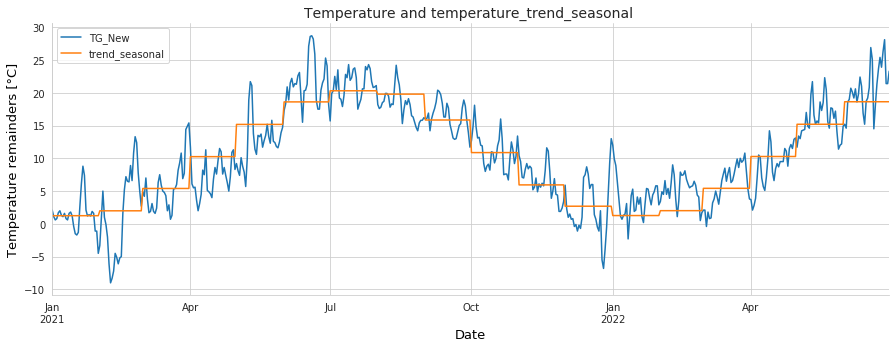

In [118]:
Temp_test[['TG_New', 'trend_seasonal']].plot(figsize=(15,5))
sns.despine()

plt.title('Temperature and temperature_trend_seasonal ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature remainders [°C]',fontsize=13,color='k')


In [51]:
Temp_test.tail(1)

,TG_New,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
datetime,,,,,,,,,,,,,,,
2022-06-30,23.3,2022,28304,0,0,0,0,1,0,0,0,0,0,0,18.632755


### Calculate the remainder for the Temp_test data.

/home/seun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Daily_Temp_remainders. [Deg Celsius]')

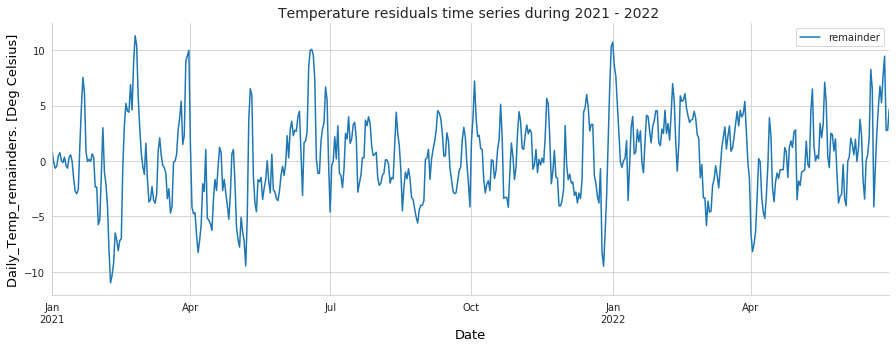

In [119]:
# combine trend and seasonality
Temp_test['remainder'] = Temp_test['TG_New'] - Temp_test['trend_seasonal']
Temp_test[['remainder']].plot(figsize=(15,5))

ax=sns.despine()
plt.title('Temperature residuals time series during 2021 - 2022 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Daily_Temp_remainders. [Deg Celsius]',fontsize=13,color='k')

In [53]:
def print_adf(data):
    
    """ Prints the results of the augmented Dickey Fuller Test"""
    
    adf_stats, p, used_lag, n_obs, levels, information_criterion = \
            statsmodels.tsa.stattools.adfuller(data)
    
    print(f"""adf_stats: {adf_stats}
            p: {p} 
            used lag: {used_lag} 
            number of observations: {n_obs}
            CI 99%: {levels['1%']}
            CI 95%: {levels['5%']}
            CI 90%: {levels['10%']}
            information criterion (AIC): {information_criterion}
            """)

In [54]:
pip install --upgrade --no-deps statsmodels

Note: you may need to restart the kernel to use updated packages.


In [55]:
import statsmodels.api

In [56]:
print_adf(Temp_test['remainder'])

adf_stats: -9.60706400808647
            p: 1.8539836337422156e-16 
            used lag: 1 
            number of observations: 544
            CI 99%: -3.4424279871882573
            CI 95%: -2.8668676073304407
            CI 90%: -2.569607433093642
            information criterion (AIC): 2316.3219497512277
            


#### Now since 'p' is below 0.05 then the (Temp_test['remainder']) it is stationary.

***Now obtain the lag for the remainder as our additional feature for the AR model, and create Lag vaiables.

*** We decide how many lags to include

*** A lag is an interval of time between two related observations

### USE SAME number of lags as train dataset for the test data

In [57]:
# Create the lagged variable
Temp_test['lag1'] = Temp_test['remainder'].shift(1)
Temp_test['lag2'] = Temp_test['remainder'].shift(2)
Temp_test['lag3'] = Temp_test['remainder'].shift(3)
Temp_test['lag4'] = Temp_test['remainder'].shift(4)
Temp_test.head()

/home/seun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/seun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/seun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,TG_New,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,,,,,
2021-01-01,2.1,2021,27759,0,0,0,0,0,0,0,0,0,0,0,1.243943,0.856057,NaN,NaN,NaN,NaN
2021-01-02,1.1,2021,27760,0,0,0,0,0,0,0,0,0,0,0,1.244005,-0.144005,0.856057,NaN,NaN,NaN
2021-01-03,0.6,2021,27761,0,0,0,0,0,0,0,0,0,0,0,1.244067,-0.644067,-0.144005,0.856057,NaN,NaN
2021-01-04,0.8,2021,27762,0,0,0,0,0,0,0,0,0,0,0,1.244129,-0.444129,-0.644067,-0.144005,0.856057,NaN
2021-01-05,1.7,2021,27763,0,0,0,0,0,0,0,0,0,0,0,1.244191,0.455809,-0.444129,-0.644067,-0.144005,0.856057


_____________________


#### After obtaining the Lags for Temp_test, we use all of the 3 existing features to build one single model.

***The 3 features are:

**The feature predicting the trend (timestep),feauture for the seasonality (monthly dummies) & feature for predicting the remainder (lag)

Since the we already build a linear model with all these features.
Then we run a linear model predicting trend and seasonality, simultaneously with 
    the AR that only predicts the small part and we get a combined result.

### Assign X_full for the test data


In [58]:
# Assign X_full
X_full = Temp_test.drop(columns=['TG_New', 'year','trend_seasonal', 'remainder'])

X_full.head() 

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
2021-01-01,27759,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2021-01-02,27760,0,0,0,0,0,0,0,0,0,0,0,0.856057,NaN,NaN,NaN
2021-01-03,27761,0,0,0,0,0,0,0,0,0,0,0,-0.144005,0.856057,NaN,NaN
2021-01-04,27762,0,0,0,0,0,0,0,0,0,0,0,-0.644067,-0.144005,0.856057,NaN
2021-01-05,27763,0,0,0,0,0,0,0,0,0,0,0,-0.444129,-0.644067,-0.144005,0.856057


In [59]:
X_full.shape

(546, 16)

### Now we fill in the missing value from the beginning of the test lag.

In [60]:
X_full.loc['2021-01-01','lag1'] = Temp.loc['2020-12-31', 'remainder']
X_full.loc['2021-01-01','lag2'] = Temp.loc['2020-12-30', 'remainder']
X_full.loc['2021-01-01','lag3'] = Temp.loc['2020-12-29', 'remainder']
X_full.loc['2021-01-01','lag4'] = Temp.loc['2020-12-28', 'remainder']

X_full.loc['2021-01-02','lag2'] = Temp.loc['2020-12-31', 'remainder']
X_full.loc['2021-01-02','lag3'] = Temp.loc['2020-12-30', 'remainder']
X_full.loc['2021-01-02','lag4'] = Temp.loc['2020-12-29', 'remainder']

X_full.loc['2021-01-03','lag3'] = Temp.loc['2020-12-31', 'remainder']
X_full.loc['2021-01-03','lag4'] = Temp.loc['2020-12-30', 'remainder']

X_full.loc['2021-01-04','lag4'] = Temp.loc['2020-12-31', 'remainder']


X_full

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
2021-01-01,27759,0,0,0,0,0,0,0,0,0,0,0,-0.047386,-0.147324,-0.347262,0.152800
2021-01-02,27760,0,0,0,0,0,0,0,0,0,0,0,0.856057,-0.047386,-0.147324,-0.347262
2021-01-03,27761,0,0,0,0,0,0,0,0,0,0,0,-0.144005,0.856057,-0.047386,-0.147324
2021-01-04,27762,0,0,0,0,0,0,0,0,0,0,0,-0.644067,-0.144005,0.856057,-0.047386
2021-01-05,27763,0,0,0,0,0,0,0,0,0,0,0,-0.444129,-0.644067,-0.144005,0.856057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,28300,0,0,0,0,1,0,0,0,0,0,0,5.267555,6.767617,4.967679,2.667741
2022-06-27,28301,0,0,0,0,1,0,0,0,0,0,0,7.667493,5.267555,6.767617,4.967679
2022-06-28,28302,0,0,0,0,1,0,0,0,0,0,0,9.467431,7.667493,5.267555,6.767617


In [61]:
# Create the predictions
Temp_test['predictions_full_model'] = m_full.predict(X_full)

/home/seun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Temperature remainders [°C]')

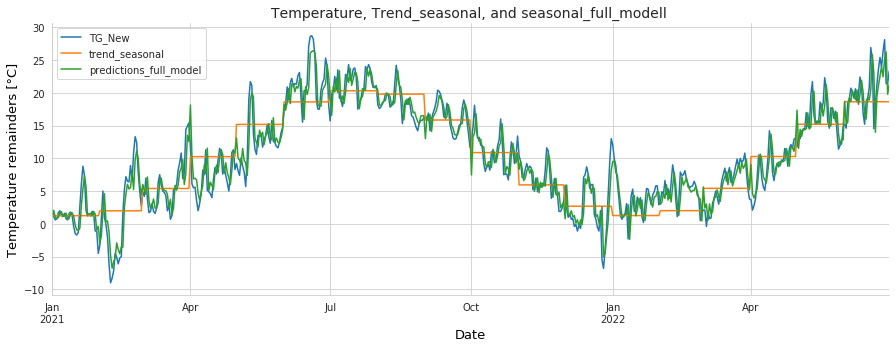

In [120]:
Temp_test[['TG_New', 'trend_seasonal', 'predictions_full_model']].plot(figsize=(15,5))
sns.despine()

plt.title('Temperature, Trend_seasonal, and seasonal_full_modell ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature remainders [°C]',fontsize=13,color='k')

In [63]:
# Create the complete dataset and plot it

Temp_full = Temp[['TG_New', 'trend_seasonal', 'predictions_full_model']].append(Temp_test[['TG_New', 'trend_seasonal', 'predictions_full_model']])

In [64]:
Temp_full.head()

,TG_New,trend_seasonal,predictions_full_model
datetime,,,
1946-01-05,1.4,-0.475206,-2.232927
1946-01-06,1.9,-0.475145,1.561770
1946-01-07,0.4,-0.475083,1.203600
1946-01-08,-1.4,-0.475021,-0.057345
1946-01-09,2.0,-0.474959,-1.311292


Text(0, 0.5, 'Temperature in °C')

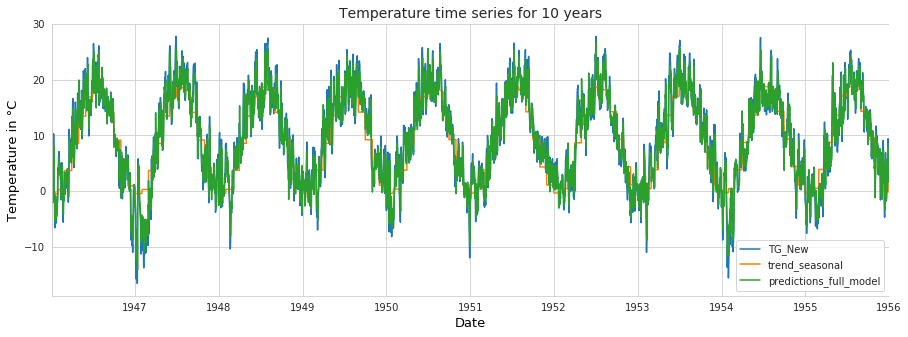

In [65]:
Temp_full[['TG_New', 'trend_seasonal', 'predictions_full_model']][:365*10].plot(figsize=(15,5))
ax=sns.despine()

plt.title('Temperature time series for 10 years', fontsize=14)
plt.xlabel("Date",fontsize=13,color='k')
plt.ylabel("Temperature in °C",fontsize=13,color='k')



In [66]:
print(f"""
{m_full.score(X_full, Temp_test['TG_New'])}
{trend_model.score(X_test, Temp_test['TG_New'])}
""")


0.9186752459805276
0.7618229852333329



Text(0, 0.5, 'Temperature [°C]')

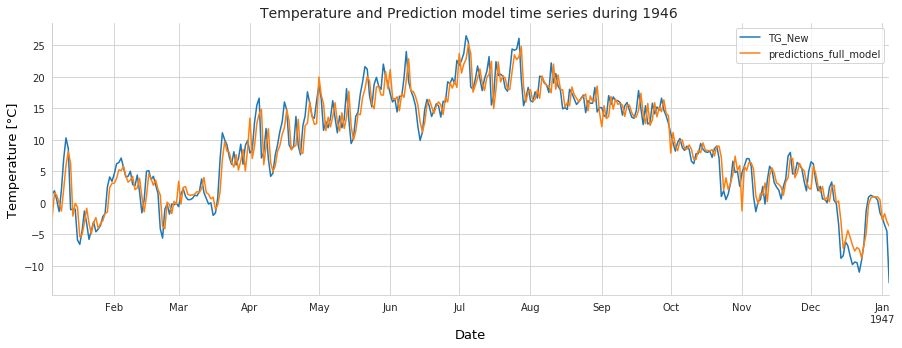

In [121]:
Temp_full[['TG_New','predictions_full_model']][:365*1].plot(figsize=(15,5))
ax=sns.despine()

plt.title('Temperature and Prediction model time series during 1946 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')

## Predict the future
    *So far we have just predicted data that we already had (train and test). 
     *We have not actually made any predictions for the future yet.

In [68]:
Temp_test.tail()

,TG_New,year,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model
datetime,,,,,,,,,,,,,,,,,,,,,
2022-06-26,26.3,2022,28300,0,0,0,0,1,0,0,...,0,0,0,18.632507,7.667493,5.267555,6.767617,4.967679,2.667741,22.440139
2022-06-27,28.1,2022,28301,0,0,0,0,1,0,0,...,0,0,0,18.632569,9.467431,7.667493,5.267555,6.767617,4.967679,25.111201
2022-06-28,21.4,2022,28302,0,0,0,0,1,0,0,...,0,0,0,18.632631,2.767369,9.467431,7.667493,5.267555,6.767617,26.243992
2022-06-29,21.4,2022,28303,0,0,0,0,1,0,0,...,0,0,0,18.632693,2.767307,2.767369,9.467431,7.667493,5.267555,19.779516
2022-06-30,23.3,2022,28304,0,0,0,0,1,0,0,...,0,0,0,18.632755,4.667245,2.767307,2.767369,9.467431,7.667493,21.283964


In [69]:
# Combine train and test data
Temp_combined = Temp.append(Temp_test)
Temp_combined.head()

,TG_New,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,lag4,predictions_full_model,year
datetime,,,,,,,,,,,,,,,,,,,,,
1946-01-05,1.4,4,0,0,0,0,0,0,0,0,...,0,0,-0.475206,1.875206,-2.224732,-2.324670,-2.524608,-2.924546,-2.232927,NaN
1946-01-06,1.9,5,0,0,0,0,0,0,0,0,...,0,0,-0.475145,2.375145,1.875206,-2.224732,-2.324670,-2.524608,1.561770,NaN
1946-01-07,0.4,6,0,0,0,0,0,0,0,0,...,0,0,-0.475083,0.875083,2.375145,1.875206,-2.224732,-2.324670,1.203600,NaN
1946-01-08,-1.4,7,0,0,0,0,0,0,0,0,...,0,0,-0.475021,-0.924979,0.875083,2.375145,1.875206,-2.224732,-0.057345,NaN
1946-01-09,2.0,8,0,0,0,0,0,0,0,0,...,0,0,-0.474959,2.474959,-0.924979,0.875083,2.375145,1.875206,-1.311292,NaN


#### Re-train the model on the whole dataset

In [70]:
X_combined = Temp_combined.drop(columns=['TG_New', 'trend_seasonal', 'remainder', 'predictions_full_model','year'])
y_combined = Temp_combined['TG_New']

In [71]:
X_combined.tail()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
2022-06-26,28300,0,0,0,0,1,0,0,0,0,0,0,5.267555,6.767617,4.967679,2.667741
2022-06-27,28301,0,0,0,0,1,0,0,0,0,0,0,7.667493,5.267555,6.767617,4.967679
2022-06-28,28302,0,0,0,0,1,0,0,0,0,0,0,9.467431,7.667493,5.267555,6.767617
2022-06-29,28303,0,0,0,0,1,0,0,0,0,0,0,2.767369,9.467431,7.667493,5.267555
2022-06-30,28304,0,0,0,0,1,0,0,0,0,0,0,2.767307,2.767369,9.467431,7.667493


In [72]:
X_combined.tail()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
2022-06-26,28300,0,0,0,0,1,0,0,0,0,0,0,5.267555,6.767617,4.967679,2.667741
2022-06-27,28301,0,0,0,0,1,0,0,0,0,0,0,7.667493,5.267555,6.767617,4.967679
2022-06-28,28302,0,0,0,0,1,0,0,0,0,0,0,9.467431,7.667493,5.267555,6.767617
2022-06-29,28303,0,0,0,0,1,0,0,0,0,0,0,2.767369,9.467431,7.667493,5.267555
2022-06-30,28304,0,0,0,0,1,0,0,0,0,0,0,2.767307,2.767369,9.467431,7.667493


* Fill in the missing value from the beginning of the test set.

In [73]:
# Fill in the missing value from the beginning of the test set.

X_combined.loc['2021-01-01','lag1'] = Temp.loc['2020-12-31', 'remainder']
X_combined.loc['2021-01-01','lag2'] = Temp.loc['2020-12-30', 'remainder']
X_combined.loc['2021-01-01','lag3'] = Temp.loc['2020-12-29', 'remainder']
X_combined.loc['2021-01-01','lag4'] = Temp.loc['2020-12-28', 'remainder']

X_combined.loc['2021-01-02','lag2'] = Temp.loc['2020-12-31', 'remainder']
X_combined.loc['2021-01-02','lag3'] = Temp.loc['2020-12-30', 'remainder']
X_combined.loc['2021-01-02','lag4'] = Temp.loc['2020-12-29', 'remainder']

X_combined.loc['2021-01-03','lag3'] = Temp.loc['2020-12-31', 'remainder']
X_combined.loc['2021-01-03','lag4'] = Temp.loc['2020-12-30', 'remainder']

X_combined.loc['2021-01-04','lag4'] = Temp.loc['2020-12-31', 'remainder']

In [74]:
X_combined.loc['2021-01-01':'2021-01-04']

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
2021-01-01,27394,0,0,0,0,0,0,0,0,0,0,0,-0.047386,-0.147324,-0.347262,0.152800
2021-01-02,27395,0,0,0,0,0,0,0,0,0,0,0,0.878665,-0.047386,-0.147324,-0.347262
2021-01-03,27396,0,0,0,0,0,0,0,0,0,0,0,-0.121397,0.878665,-0.047386,-0.147324
2021-01-04,27397,0,0,0,0,0,0,0,0,0,0,0,-0.621459,-0.121397,0.878665,-0.047386
2021-01-01,27759,0,0,0,0,0,0,0,0,0,0,0,-0.047386,-0.147324,-0.347262,0.152800
2021-01-02,27760,0,0,0,0,0,0,0,0,0,0,0,0.856057,-0.047386,-0.147324,-0.347262
2021-01-03,27761,0,0,0,0,0,0,0,0,0,0,0,-0.144005,0.856057,-0.047386,-0.147324
2021-01-04,27762,0,0,0,0,0,0,0,0,0,0,0,-0.644067,-0.144005,0.856057,-0.047386


In [75]:
X_combined.tail()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
datetime,,,,,,,,,,,,,,,,
2022-06-26,28300,0,0,0,0,1,0,0,0,0,0,0,5.267555,6.767617,4.967679,2.667741
2022-06-27,28301,0,0,0,0,1,0,0,0,0,0,0,7.667493,5.267555,6.767617,4.967679
2022-06-28,28302,0,0,0,0,1,0,0,0,0,0,0,9.467431,7.667493,5.267555,6.767617
2022-06-29,28303,0,0,0,0,1,0,0,0,0,0,0,2.767369,9.467431,7.667493,5.267555
2022-06-30,28304,0,0,0,0,1,0,0,0,0,0,0,2.767307,2.767369,9.467431,7.667493


In [76]:
m_combined = LinearRegression()
m_combined.fit(X_combined, y_combined)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### No we create a single future step data.

In [77]:
# Now we predict first date in the future? --> 2022-07-01

timestep = Temp_combined['timestep'].max() + 1

months = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

lag1 = Temp_combined.loc['2022-06-30', 'remainder']
lag2 = Temp_combined.loc['2022-06-29', 'remainder']
lag3 = Temp_combined.loc['2022-06-28', 'remainder']
lag4 = Temp_combined.loc['2022-06-27', 'remainder']


In [78]:
timestep, months, lag1, lag2, lag3, lag4

(28305,
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 datetime
 2022-06-30    4.667245
 Name: remainder, dtype: float64,
 datetime
 2022-06-29    2.767307
 Name: remainder, dtype: float64,
 datetime
 2022-06-28    2.767369
 Name: remainder, dtype: float64,
 datetime
 2022-06-27    9.467431
 Name: remainder, dtype: float64)

In [79]:
X_future = [timestep]

X_future

[28305]

In [80]:
X_future.extend(months)
X_future

[28305, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

* Observe below what would have happened above if you had used append instead of extend.

In [81]:
X_future.append(lag1)
X_future.append(lag2)
X_future.append(lag3)
X_future.append(lag4)

X_future

[28305,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 datetime
 2022-06-30    4.667245
 Name: remainder, dtype: float64,
 datetime
 2022-06-29    2.767307
 Name: remainder, dtype: float64,
 datetime
 2022-06-28    2.767369
 Name: remainder, dtype: float64,
 datetime
 2022-06-27    9.467431
 Name: remainder, dtype: float64]

In [82]:
X_future = pd.DataFrame([X_future])
X_future.columns = X_combined.columns

X_future

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
0,28305,0,0,0,0,0,1,0,0,0,0,0,datetime 2022-06-30 4.667245 Name: remainde...,datetime 2022-06-29 2.767307 Name: remainde...,datetime 2022-06-28 2.767369 Name: remainde...,datetime 2022-06-27 9.467431 Name: remainde...


In [83]:
m_combined.predict(X_future)

array([24.43710183])

#### The predicted temperature value is 24.44°

________________________________

## EXTRAs

* The temperature time series, trend, seasonal, and remainder/residulas can be plotted at once using 'statsmodel'  

In [84]:
#!pip install statsmodels

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

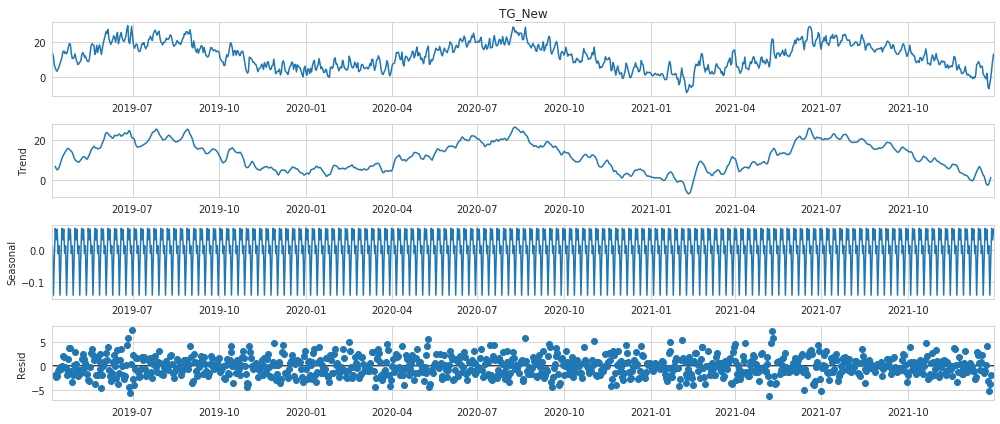

In [86]:
sd = seasonal_decompose(Temp['TG_New'][-1000:], model='additive')

plt.rcParams['figure.figsize'] = (14,6)
sd.plot()
None


### AR

In [87]:
!pip install statsmodels --upgrade

In [88]:
from statsmodels.tsa.ar_model import AutoReg

In [89]:
Temp['remainder']=Temp['TG_New']- Temp['trend_seasonal']

In [90]:
from statsmodels.tsa.ar_model import ar_select_order

selected_order = ar_select_order(Temp['remainder'], maxlag=12)
selected_order.ar_lags

/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4]

In [91]:
ar_model = AutoReg(endog=Temp['remainder'], lags=4).fit()

/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [92]:
Temp['ar_prediction'] = ar_model.predict()

Text(0, 0.5, 'Temperature [°C]')

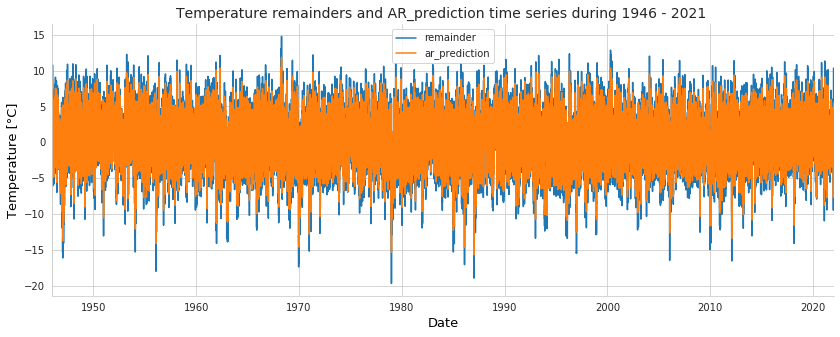

In [122]:
Temp[['remainder', 'ar_prediction']].plot(figsize=(14,5),legend=True)
sns.despine()

plt.title('Temperature remainders and AR_prediction time series during 1946 - 2021 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')


In [94]:
Temp['full_prediction_ar'] = Temp['trend_seasonal'] + Temp['ar_prediction']

Text(0, 0.5, 'Temperature [°C]')

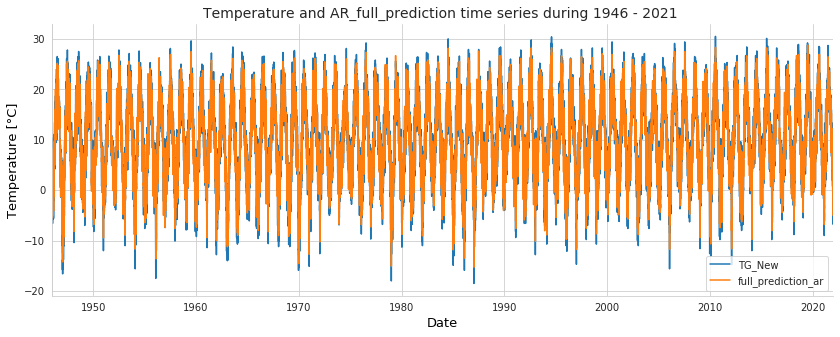

In [123]:
Temp[['TG_New', 'full_prediction_ar']].plot(figsize=(14,5),legend=True)
sns.despine()

plt.title('Temperature and AR_full_prediction time series during 1946 - 2021 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')


Text(0, 0.5, 'Temperature in °C')

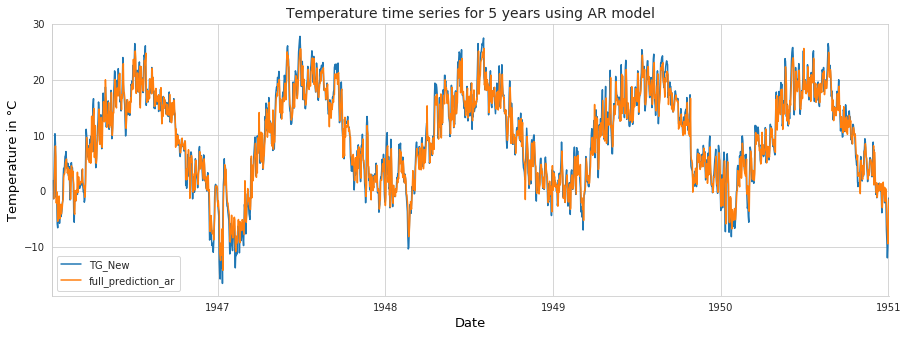

In [96]:
Temp[['TG_New', 'full_prediction_ar']][:365*5].plot(figsize=(15,5))
ax=sns.despine()

plt.title('Temperature time series for 5 years using AR model', fontsize=14)
plt.xlabel("Date",fontsize=13,color='k')
plt.ylabel("Temperature in °C",fontsize=13,color='k')


_____________________________________

### ARIMA

In [97]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
Temp['remainder'] = Temp['TG_New'] - Temp['trend_seasonal']

In [99]:
arima_model = ARIMA(Temp['remainder'], order=(1, 0, 1)).fit()

/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/seun/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [100]:
Temp['arima_prediction'] = arima_model.predict()

Text(0, 0.5, 'Temperature [°C]')

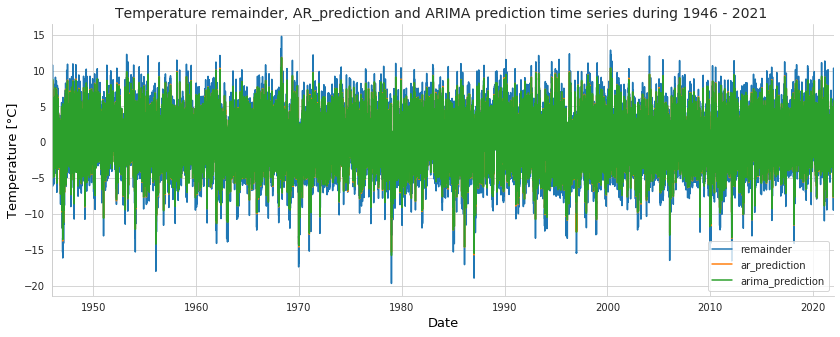

In [124]:
Temp[['remainder', 'ar_prediction', 'arima_prediction']].plot(figsize=(14,5),legend=True)
sns.despine()

plt.title('Temperature remainder, AR_prediction and ARIMA prediction time series during 1946 - 2021 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')

Text(0, 0.5, 'Temperature [°C]')

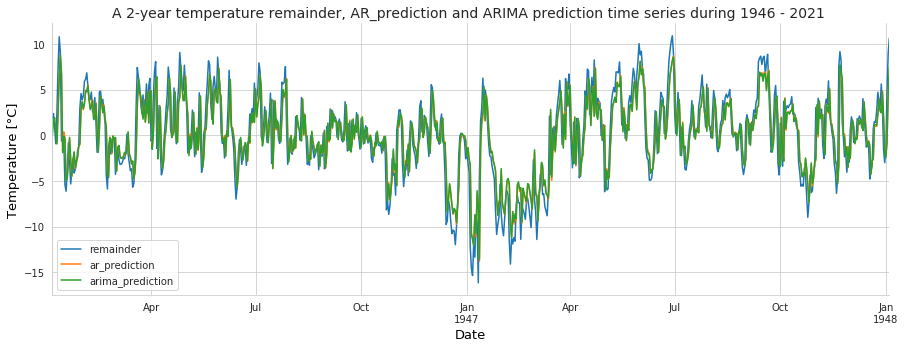

In [125]:
Temp[['remainder', 'ar_prediction', 'arima_prediction']][:365*2].plot(figsize=(15,5))
ax=sns.despine()

plt.title('A 2-year temperature remainder, AR_prediction and ARIMA prediction time series during 1946 - 2021 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')


In [103]:
Temp['full_prediction_arima'] = Temp['trend_seasonal'] + Temp['arima_prediction']

Text(0, 0.5, 'Temperature [°C]')

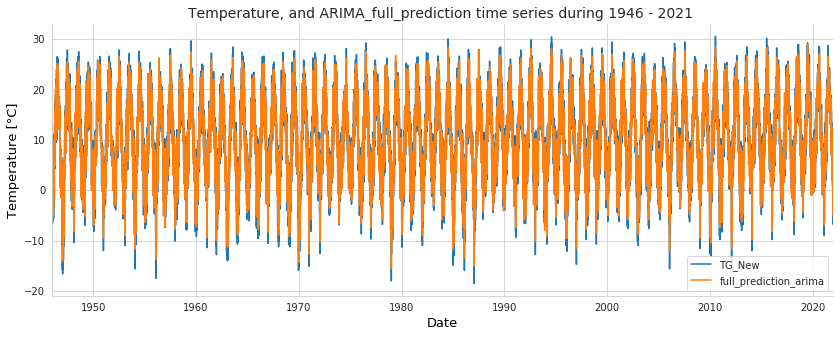

In [126]:
Temp[['TG_New', 'full_prediction_arima']].plot(figsize=(14,5),legend=True)
sns.despine()

plt.title('Temperature, and ARIMA_full_prediction time series during 1946 - 2021 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')

Text(0, 0.5, 'Temperature [°C]')

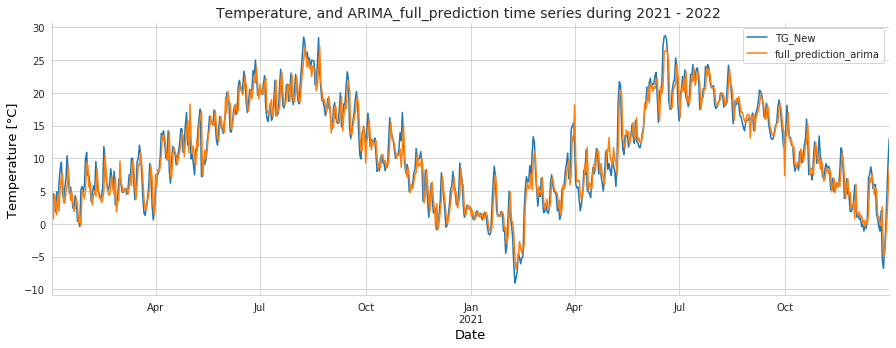

In [127]:
Temp[['TG_New', 'full_prediction_arima']][-365*2:].plot(figsize=(15,5))
ax=sns.despine()

plt.title('Temperature, and ARIMA_full_prediction time series during 2021 - 2022 ', fontsize=14)
plt.xlabel('Date',fontsize=13,color='k')
plt.ylabel('Temperature [°C]',fontsize=13,color='k')

In [106]:
#d1 = {'col1': [1, 2, 3, -44,5,7,-44]}
#d2 = {'col2': [55, 16, 33, 90,5,7,52]}

#df1 = pd.DataFrame(data=d1)
#df2 = pd.DataFrame(data=d2)

#for i, j in df1.col1.iteritems():
   # if j == -44:
      #  for x, y in df2.col2.iteritems():
         #   if i == x:
           #     df1.loc[i, 'col1'] = y